In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pengumpulan Data

In [ ]:
# Baca file CSV
df = pd.read_csv('/content/data_saham_INDF.csv', delimiter=';')
print(df.head())
print('...')
print(df.tail())

         Date     Open     High      Low    Close   Volume
0  01/01/2019  5711.99  5711.99  5711.99  5711.99        0
1  02/01/2019  5692.82  5711.99  5558.65  5577.82  2114300
2  03/01/2019  5616.15  5750.32  5616.15  5731.16  7396900
3  04/01/2019  5673.65  5807.83  5635.32  5692.82  6549600
4  07/01/2019  5750.33  5865.33  5673.65  5692.82  8385000
...
            Date     Open     High      Low    Close   Volume
1536  22/04/2025  7074.88  7099.02  6905.85  6954.15  5953600
1537  23/04/2025  6978.29  7171.46  6978.29  7099.02  9914800
1538  24/04/2025  7050.73  7074.88  6905.85  7002.44  6334700
1539  25/04/2025  7026.59  7219.76  7026.59  7219.76  5156600
1540  28/04/2025  7219.76  7243.90  7099.02  7171.46  2930700


# Preprocessing Data

In [ ]:
# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Menghapus data yang tidak memiliki nilai (missing values) pada kolom 'Close'
df['Close'] = pd.to_numeric(df['Close']) # Mengubah ke numerik
df.dropna(subset=['Close'], inplace=True)

# Memilih hanya kolom 'Date' dan 'Close' untuk keperluan analisis
data = df[['Date', 'Close']].copy()

print("\nData setelah praproses:")
print(data.head())
print('....')
print(data.tail())
print("\nInformasi tipe data setelah praproses:")
data.info()


Data setelah praproses:
        Date    Close
0 2019-01-01  5711.99
1 2019-01-02  5577.82
2 2019-01-03  5731.16
3 2019-01-04  5692.82
4 2019-01-07  5692.82
....
           Date    Close
1536 2025-04-22  6954.15
1537 2025-04-23  7099.02
1538 2025-04-24  7002.44
1539 2025-04-25  7219.76
1540 2025-04-28  7171.46

Informasi tipe data setelah praproses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1541 non-null   datetime64[ns]
 1   Close   1541 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB



Deskripsi Statistik Harga Penutupan (Close):
count    1541.000000
mean     5842.623407
std       627.761147
min      3968.130000
25%      5421.810000
50%      5778.550000
75%      6135.080000
max      7920.000000
Name: Close, dtype: float64


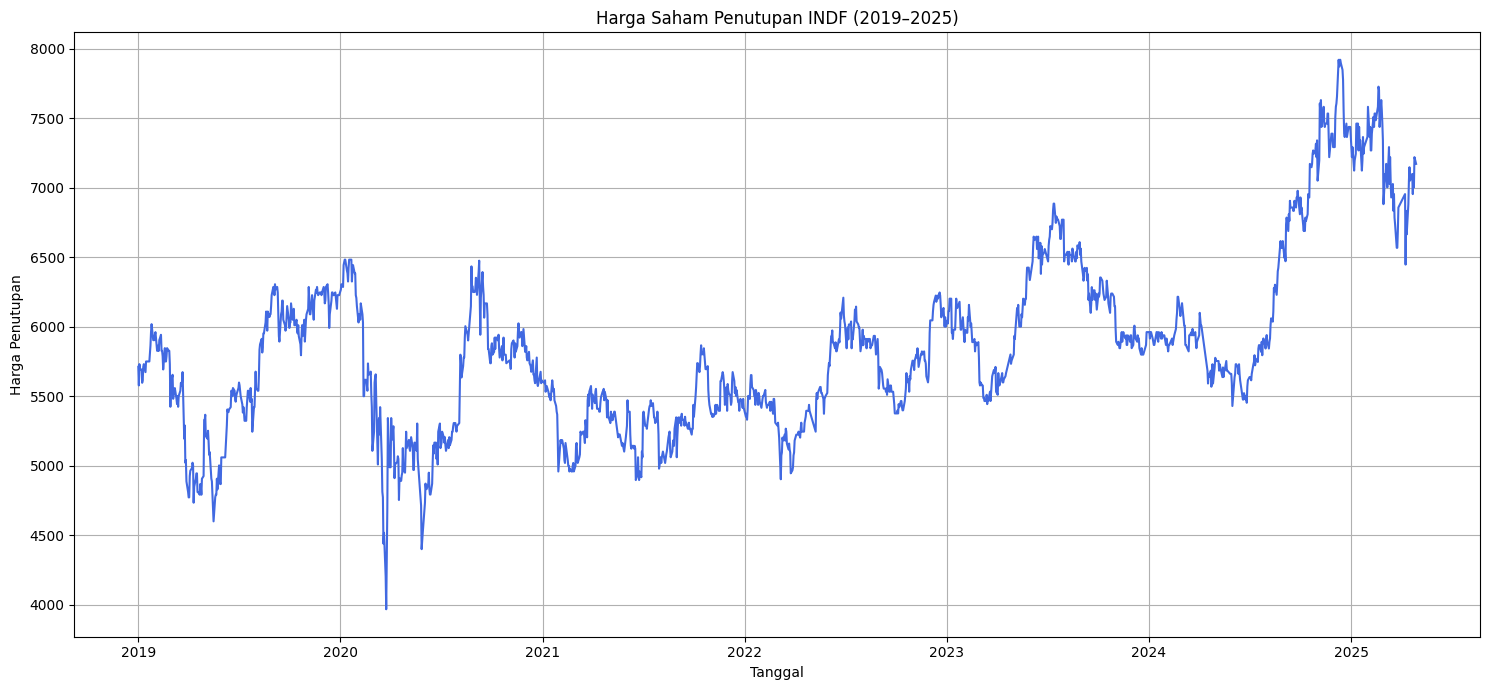

In [ ]:
# Menampilkan deskripsi statistik
print("\nDeskripsi Statistik Harga Penutupan (Close):")
descriptive_stats = df['Close'].describe()
print(data['Close'].describe())

# Visualisasi harga penutupan
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='Date', y='Close', color='royalblue')
plt.title('Harga Saham Penutupan INDF (2019–2025)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Transformation

## Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)

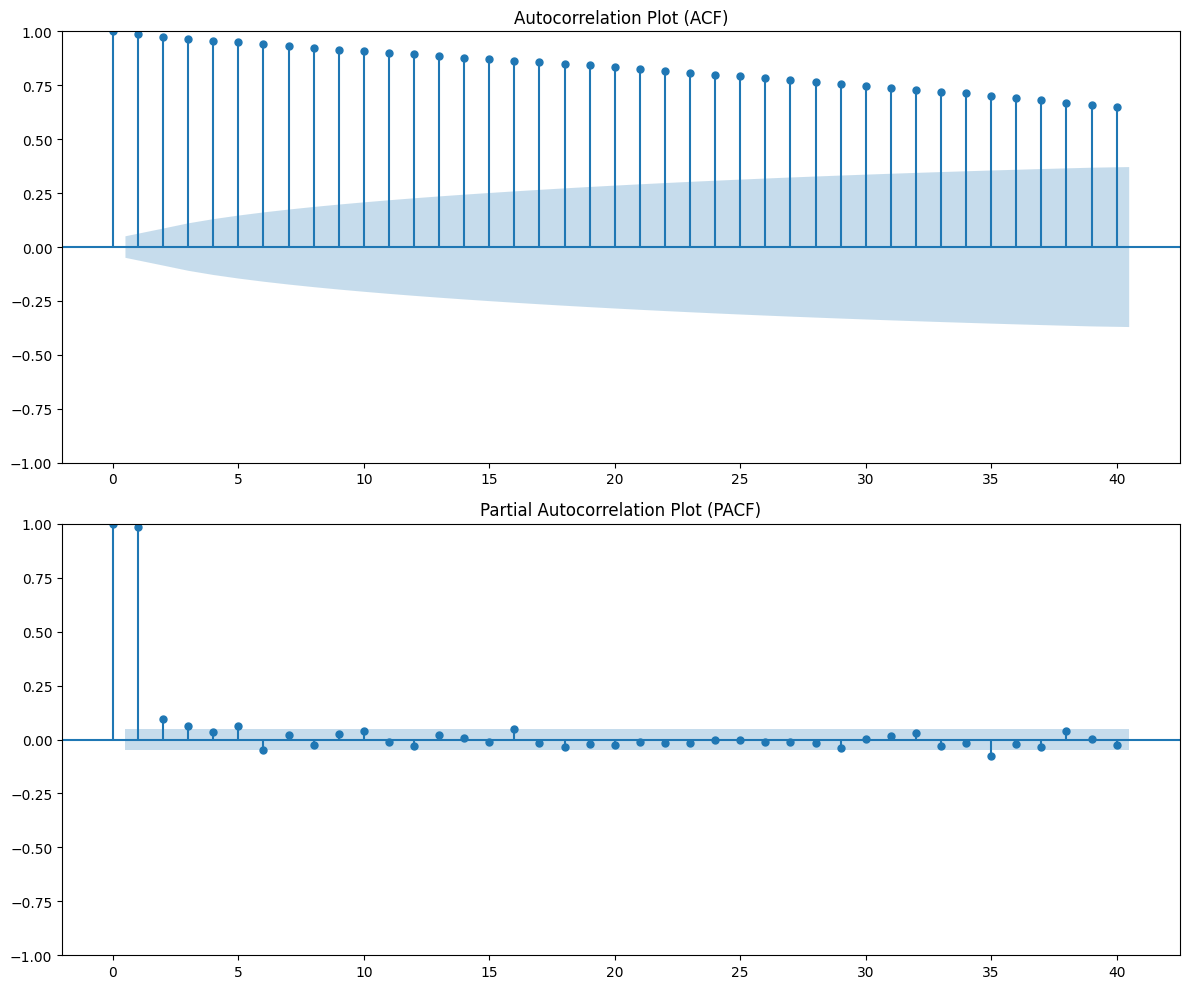

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Buat figure dan axes manual
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# ACF
plot_acf(df['Close'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Plot (ACF)')

# PACF
plot_pacf(df['Close'], lags=40, ax=ax[1], method='ywm')
ax[1].set_title('Partial Autocorrelation Plot (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
# Fungsi uji ADF dan cetak hasil
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Uji ADF untuk {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[:4], labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Data bersifat stasioner")
    else:
        print("Data tidak stasioner\n")

# Uji stasioneritas awal
adf_test(df['Close'], title='Harga Penutupan (Close)')

# Differencing pertama
df['Close_diff'] = df['Close'].diff()
adf_test(df['Close_diff'], title='Close setelah Differencing 1x')

Uji ADF untuk Harga Penutupan (Close)
ADF Statistic: -1.9793042457979608
p-value: 0.2957205328087734
# Lags Used: 5
Number of Observations Used: 1535
Data tidak stasioner

Uji ADF untuk Close setelah Differencing 1x
ADF Statistic: -22.88983831391863
p-value: 0.0
# Lags Used: 3
Number of Observations Used: 1536
Data bersifat stasioner


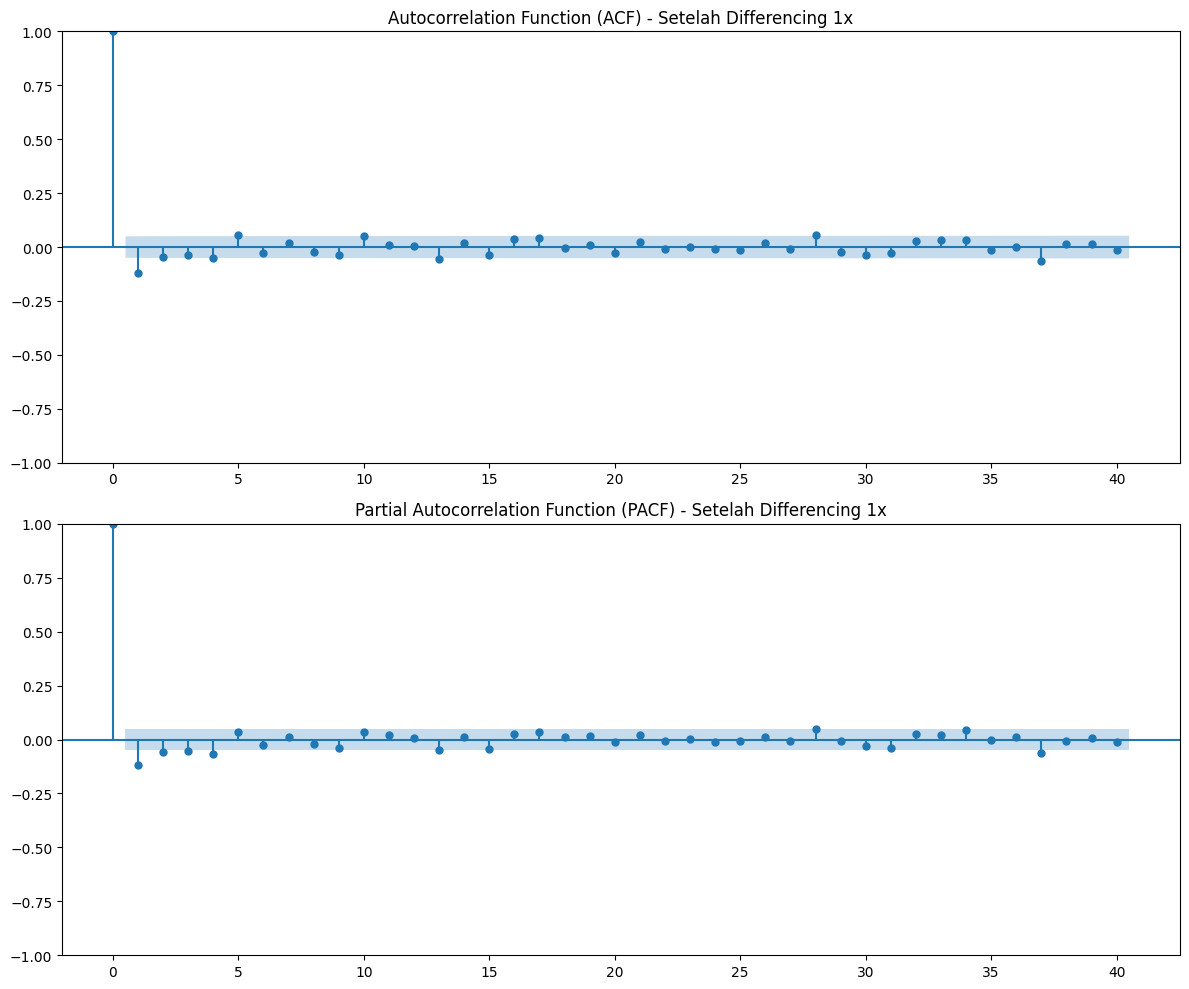

In [ ]:
data_diff = df['Close'].diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

plot_acf(data_diff, ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF) - Setelah Differencing 1x')

plot_pacf(data_diff, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) - Setelah Differencing 1x')

plt.tight_layout()
plt.show()

## Pembagian Data (Training & Testing)

Total Observasi: 1541
Jumlah Data Latih (Training): 1232
Jumlah Data Uji (Testing): 309



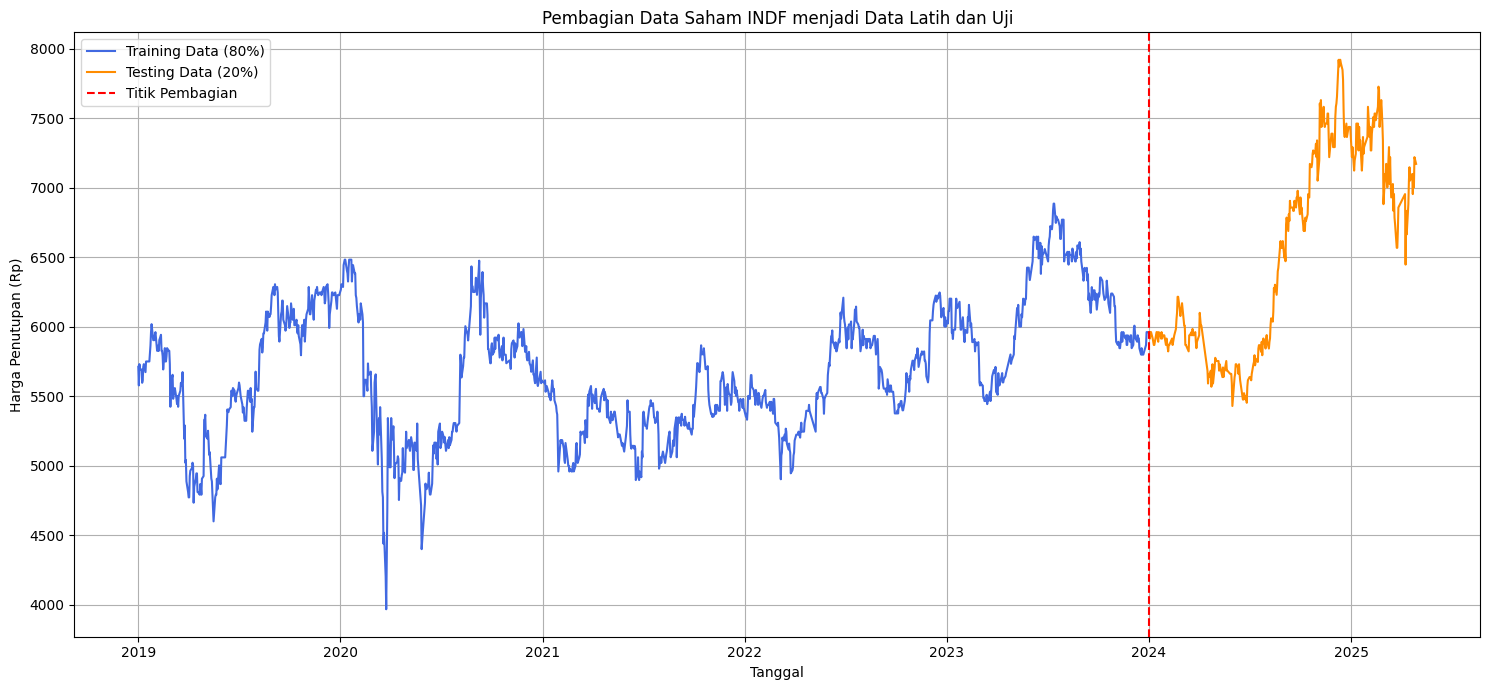

In [ ]:
# Bagi data menjadi training dan testing
split_index = int(len(data) * 0.8)
train = data[:split_index]
test = data[split_index:]

# Hasil pembagian
print(f"Total Observasi: {len(data)}")
print(f"Jumlah Data Latih (Training): {len(train)}")
print(f"Jumlah Data Uji (Testing): {len(test)}")

# Visualisasi hasil pembagian data untuk konfirmasi
plt.figure(figsize=(15, 7))
plt.plot(train['Date'], train['Close'], color='royalblue', label='Training Data (80%)')
plt.plot(test['Date'], test['Close'], color='darkorange', label='Testing Data (20%)')
plt.axvline(x=test['Date'].min(), color='red', linestyle='--', label='Titik Pembagian')
print('')
plt.title('Pembagian Data Saham INDF menjadi Data Latih dan Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Rp)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model ARIMA & Evaluasi (RMSE & MAE)

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# List parameter ARIMA (p, d, q)
params = [(1,1,0), (0,1,1), (1,1,1), (2,1,1), (2,1,2), (3,1,1), (1,1,2), (3,1,2), (4,1,1), (0,1,2)]
results = []

for order in params:
    print(f"\n*Evaluasi Model ARIMA{order}")
    try:
        model = ARIMA(train['Close'], order=order).fit()

        # Prediksi
        forecast = model.forecast(steps=len(test))
        forecast.index = test['Date']
        actual = test.set_index('Date')['Close']

        # Evaluasi
        rmse = np.sqrt(mean_squared_error(actual, forecast))
        mae = mean_absolute_error(actual, forecast)
        mape = np.mean(np.abs((actual - forecast) / actual)) * 100
        print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}")
        results.append({'Order': order, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})
    except Exception as e:
        print(f"Error pada ARIMA{order}: {e}")

# Tampilkan hasil semua pengujian
results_df = pd.DataFrame(results)
print("\n*Ringkasan Evaluasi Semua Model:")
print(results_df.sort_values(by='RMSE'))


*Evaluasi Model ARIMA(1, 1, 0)
RMSE: 917.78, MAE: 711.43, MAPE: 10.11

*Evaluasi Model ARIMA(0, 1, 1)
RMSE: 918.19, MAE: 711.62, MAPE: 10.12

*Evaluasi Model ARIMA(1, 1, 1)
RMSE: 932.35, MAE: 718.07, MAPE: 10.19

*Evaluasi Model ARIMA(2, 1, 1)
RMSE: 932.56, MAE: 718.19, MAPE: 10.19

*Evaluasi Model ARIMA(2, 1, 2)
RMSE: 932.55, MAE: 718.18, MAPE: 10.19

*Evaluasi Model ARIMA(3, 1, 1)
RMSE: 932.46, MAE: 718.14, MAPE: 10.19

*Evaluasi Model ARIMA(1, 1, 2)
RMSE: 932.62, MAE: 718.22, MAPE: 10.19

*Evaluasi Model ARIMA(3, 1, 2)
RMSE: 932.52, MAE: 718.17, MAPE: 10.19

*Evaluasi Model ARIMA(4, 1, 1)
RMSE: 931.46, MAE: 717.68, MAPE: 10.18

*Evaluasi Model ARIMA(0, 1, 2)
RMSE: 926.05, MAE: 715.22, MAPE: 10.16

*Ringkasan Evaluasi Semua Model:
       Order        RMSE         MAE       MAPE
0  (1, 1, 0)  917.781544  711.429126  10.114419
1  (0, 1, 1)  918.194555  711.620135  10.116498
9  (0, 1, 2)  926.052521  715.223788  10.155688
8  (4, 1, 1)  931.455456  717.675891  10.182363
2  (1, 1, 1)  93

In [ ]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA
# Install pmdarima if not already installed
!pip install pmdarima

from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error


# ================================
# DATA PREPARATION
# ================================
# Pastikan dataframe memiliki kolom: Date dan Close
# Date sudah dalam format datetime

data = data.sort_values('Date')
data = data[['Date', 'Close']].dropna()

# Split data: 80% training, 20% testing
split_index = int(len(data) * 0.8)
train = data.iloc[:split_index]
test = data.iloc[split_index:]

train_series = train.set_index('Date')['Close']
test_series = test.set_index('Date')['Close']

# Ensure DatetimeIndex has frequency for both series
# Use 'B' for Business Day Frequency, and forward fill any missing dates introduced by asfreq
train_series = train_series.asfreq('B').fillna(method='ffill')
test_series = test_series.asfreq('B').fillna(method='ffill')


# ================================
# EVALUASI ARIMA MANUAL
# ================================
params = [
    (1, 1, 0),
    (0, 1, 1),
    (1, 1, 1),
    (2, 1, 1),
    (2, 1, 2),
    (3, 1, 1),
    (1, 1, 2),
    (3, 1, 2),
    (4, 1, 1),
    (0, 1, 2)
]

results = []

print("\n===== EVALUASI ARIMA MANUAL =====")

for order in params:
    print(f"\nEvaluasi Model ARIMA{order}")
    try:
        model = ARIMA(train_series, order=order)
        fitted_model = model.fit()

        forecast = fitted_model.forecast(steps=len(test_series))
        forecast.index = test_series.index

        rmse = np.sqrt(mean_squared_error(test_series, forecast))
        mae = mean_absolute_error(test_series, forecast)
        mape = np.mean(np.abs((test_series - forecast) / test_series)) * 100

        print(f"RMSE: {rmse:.2f}")
        print(f"MAE : {mae:.2f}")
        print(f"MAPE: {mape:.2f}")

        results.append({
            'Model': f'ARIMA{order}',
            'Order': order,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        })

    except Exception as e:
        print(f"Gagal pada ARIMA{order}: {e}")


# ================================
# AUTO ARIMA (AIC/BIC)
# ================================
print("\n===== AUTO ARIMA (AIC) =====")

auto_model = auto_arima(
    train_series,
    start_p=0,
    start_q=0,
    max_p=5,
    max_q=5,
    d=1,
    seasonal=False,
    stepwise=True,
    information_criterion='aic',
    suppress_warnings=True,
    error_action='ignore'
)

print(auto_model.summary())

auto_forecast = auto_model.predict(n_periods=len(test_series))
auto_forecast = pd.Series(auto_forecast, index=test_series.index)

# Remove NaN values before calculating RMSE and MAE
combined_df = pd.DataFrame({'Actual': test_series, 'Forecast': auto_forecast}).dropna()
auto_rmse = np.sqrt(mean_squared_error(combined_df['Actual'], combined_df['Forecast']))
auto_mae = mean_absolute_error(combined_df['Actual'], combined_df['Forecast'])
auto_mape = np.mean(np.abs((combined_df['Actual'] - combined_df['Forecast']) / combined_df['Actual'])) * 100

print(f"\nAuto ARIMA{auto_model.order}")
print(f"RMSE: {auto_rmse:.2f}")
print(f"MAE : {auto_mae:.2f}")
print(f"MAPE: {auto_mape:.2f}")

results.append({
    'Model': f'auto_arima{auto_model.order}',
    'Order': auto_model.order,
    'RMSE': auto_rmse,
    'MAE': auto_mae,
    'MAPE': auto_mape
})


# ================================
# RINGKASAN HASIL
# ================================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')

print("\n===== RINGKASAN EVALUASI MODEL ====")
print(results_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.8 MB/s eta 0:00:00


/tmp/ipython-input-334047633.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_series = train_series.asfreq('B').fillna(method='ffill')
/tmp/ipython-input-334047633.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_series = test_series.asfreq('B').fillna(method='ffill')



===== EVALUASI ARIMA MANUAL =====

Evaluasi Model ARIMA(1, 1, 0)
RMSE: 907.50
MAE : 701.36
MAPE: 9.98

Evaluasi Model ARIMA(0, 1, 1)
RMSE: 907.75
MAE : 701.48
MAPE: 9.98

Evaluasi Model ARIMA(1, 1, 1)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 923.13
MAE : 708.59
MAPE: 10.06

Evaluasi Model ARIMA(2, 1, 1)
RMSE: 922.86
MAE : 708.45
MAPE: 10.06

Evaluasi Model ARIMA(2, 1, 2)
RMSE: 919.41
MAE : 706.82
MAPE: 10.04

Evaluasi Model ARIMA(3, 1, 1)
RMSE: 921.38
MAE : 707.71
MAPE: 10.05

Evaluasi Model ARIMA(1, 1, 2)
RMSE: 923.27
MAE : 708.67
MAPE: 10.06

Evaluasi Model ARIMA(3, 1, 2)
RMSE: 914.62
MAE : 704.57
MAPE: 10.02

Evaluasi Model ARIMA(4, 1, 1)
RMSE: 918.96
MAE : 706.60
MAPE: 10.04

Evaluasi Model ARIMA(0, 1, 2)
RMSE: 914.09
MAE : 704.40
MAPE: 10.02

===== AUTO ARIMA (AIC) =====
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1304
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -7749.618
Date:                Fri, 19 Dec 2025   AIC                          15513.235
Time:                        02:48:45   BIC                          15549.442
Sample:                    01-01-2019   HQIC          

### Visulisasi Model ARIMA Parameter Terbaik

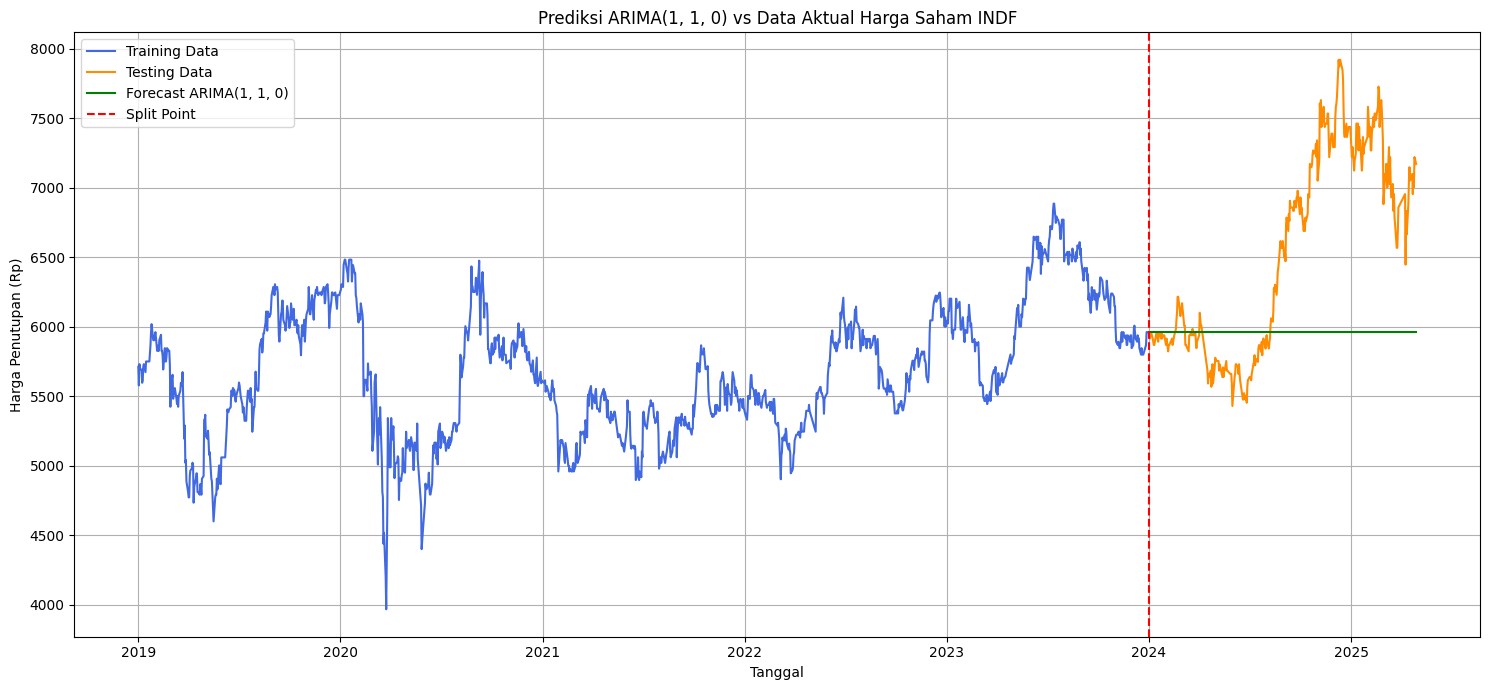

In [ ]:
# Ambil parameter terbaik berdasarkan RMSE terkecil
best_order = results_df.loc[results_df['RMSE'].idxmin(), 'Order']

# Latih dan Prediksi menggunakan model terbaik
best_model = ARIMA(train['Close'], order=best_order).fit()
best_forecast = best_model.forecast(steps=len(test))
best_forecast.index = test['Date']

# Visualisasi prediksi vs data aktual untuk model terbaik
plt.figure(figsize=(15, 7))
plt.plot(train['Date'], train['Close'], label='Training Data', color='royalblue')
plt.plot(test['Date'], test['Close'], label='Testing Data', color='darkorange')
plt.plot(test['Date'], best_forecast, label=f'Forecast ARIMA{best_order}', color='green')
plt.axvline(x=test['Date'].min(), color='red', linestyle='--', label='Split Point')
plt.title(f'Prediksi ARIMA{best_order} vs Data Aktual Harga Saham INDF')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Rp)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Prophet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Persiapan data latih
prophet_train = train.rename(columns={'Date': 'ds', 'Close': 'y'})
# Inisialisasi & latih model
model = Prophet(yearly_seasonality=True, n_changepoints=50, changepoint_prior_scale=0.001)
model.fit(prophet_train)
# Prediksi ke depan sesuai panjang data uji
future = model.make_future_dataframe(periods=len(test), freq='B')
forecast = model.predict(future)

# Ringkasan prediksi
print("\nHasil prediksi Prophet:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Hasil prediksi Prophet:
             ds         yhat   yhat_lower   yhat_upper
1536 2025-02-28  5797.275828  5320.645439  6295.961919
1537 2025-03-03  5755.781475  5283.881670  6226.919606
1538 2025-03-04  5743.143076  5292.748297  6233.311077
1539 2025-03-05  5717.518929  5245.880871  6185.045895
1540 2025-03-06  5697.924071  5247.859766  6147.970031


### Visualisasi Model Prophet dan Evaluasi RMSE & MAE

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Menguji Changepoint Prior Scale: 0.001 ---


/tmp/ipython-input-3292844256.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  prophet_results_df = pd.concat([prophet_results_df, pd.DataFrame([{


✅ Hasil: RMSE=816.94, MAE=632.96, MAPE=8.98


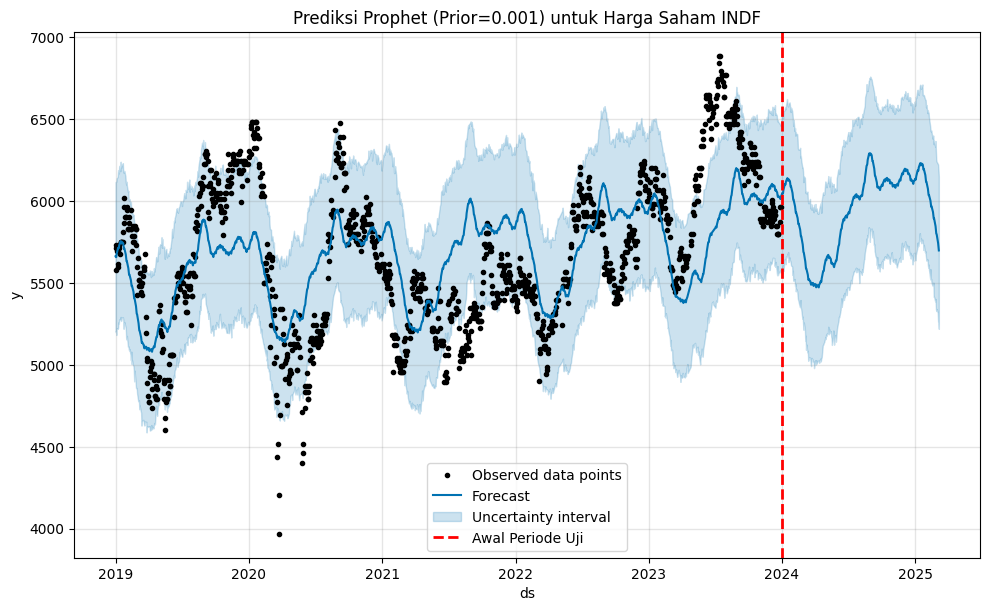

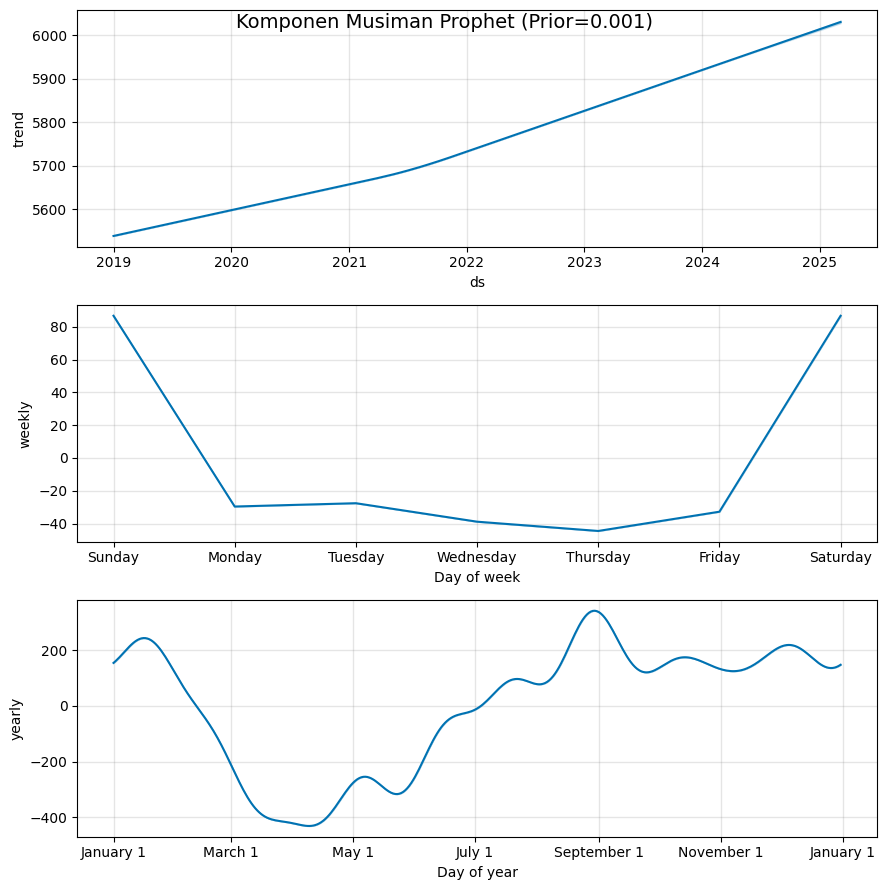

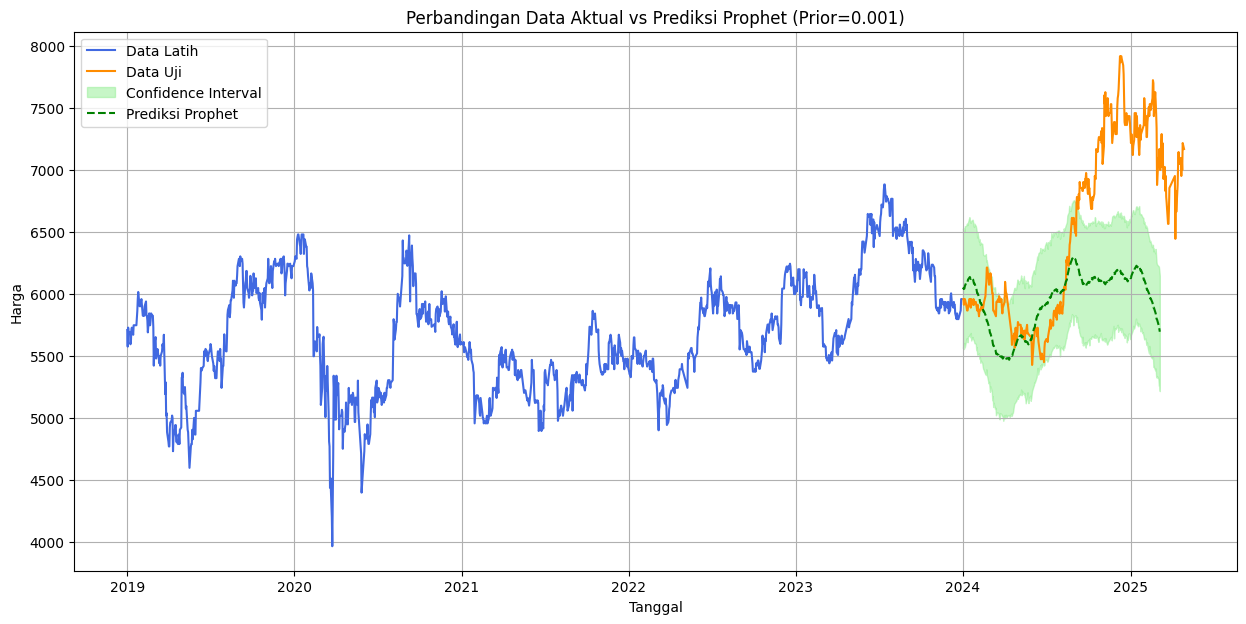

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Menguji Changepoint Prior Scale: 0.01 ---
✅ Hasil: RMSE=499.77, MAE=424.41, MAPE=6.47


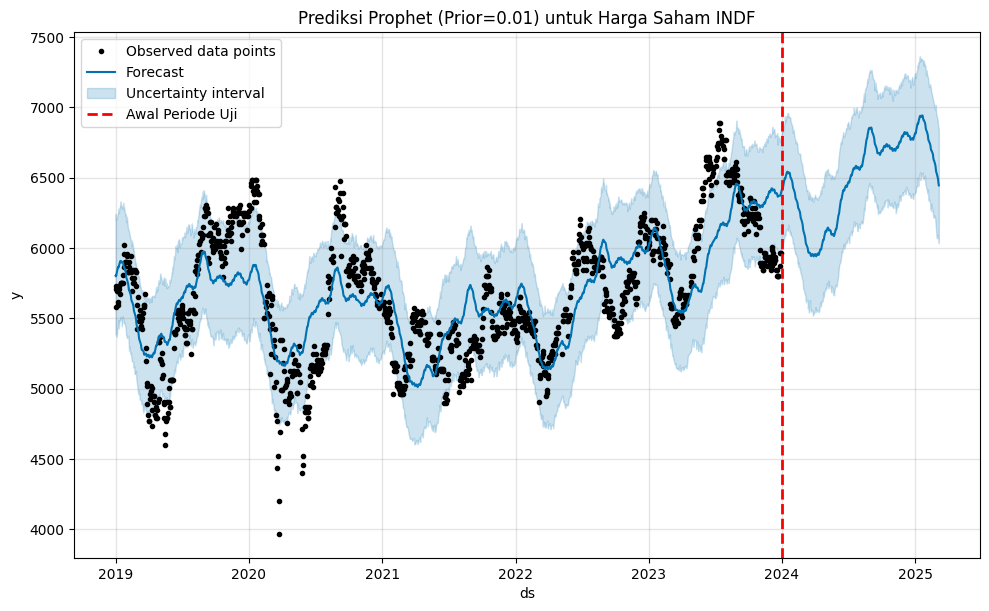

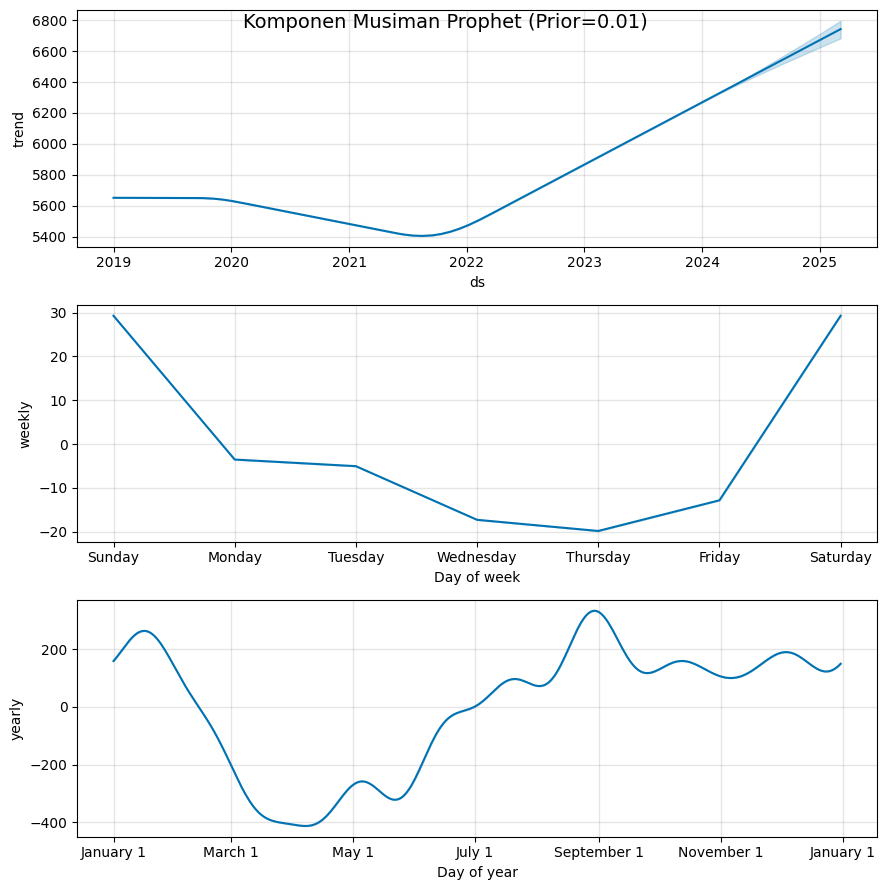

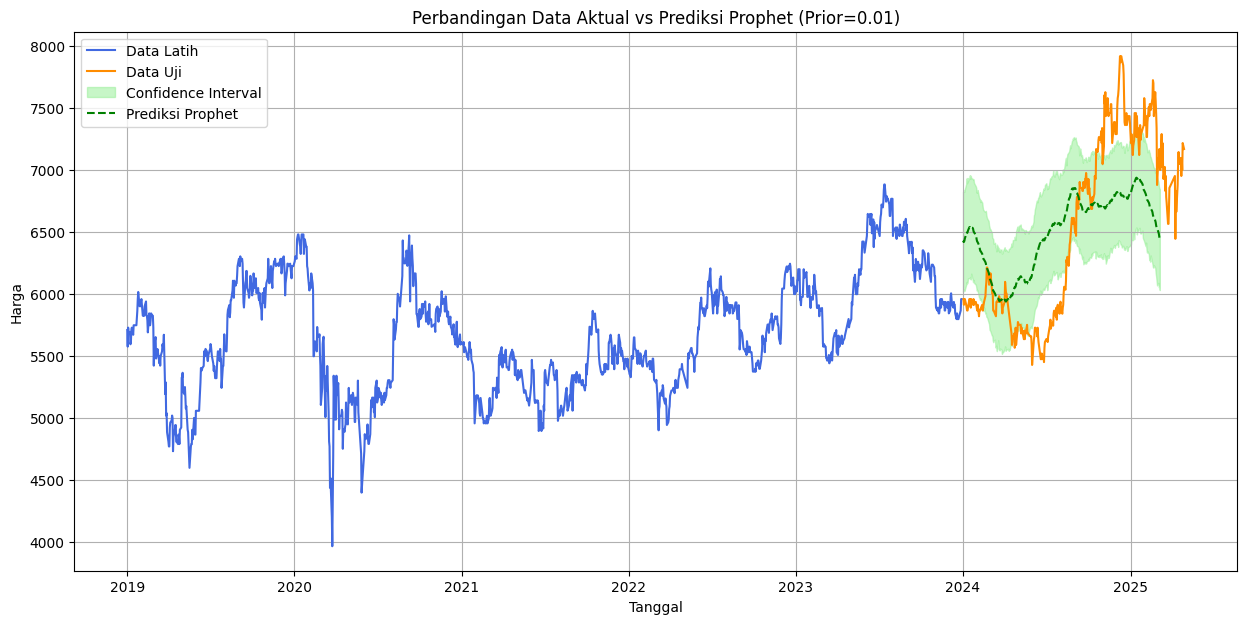

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Menguji Changepoint Prior Scale: 0.05 ---
✅ Hasil: RMSE=608.79, MAE=512.89, MAPE=7.69


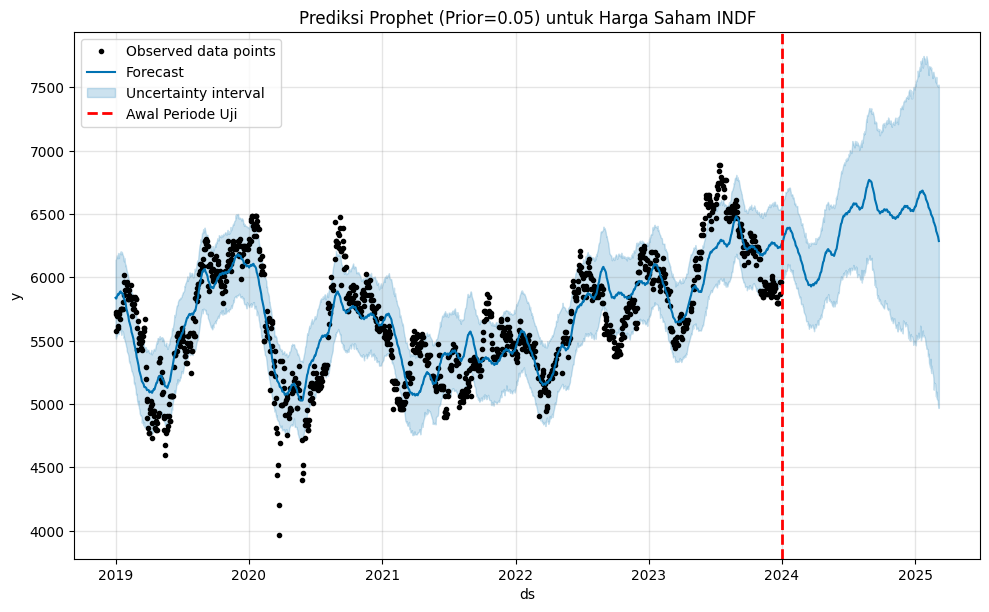

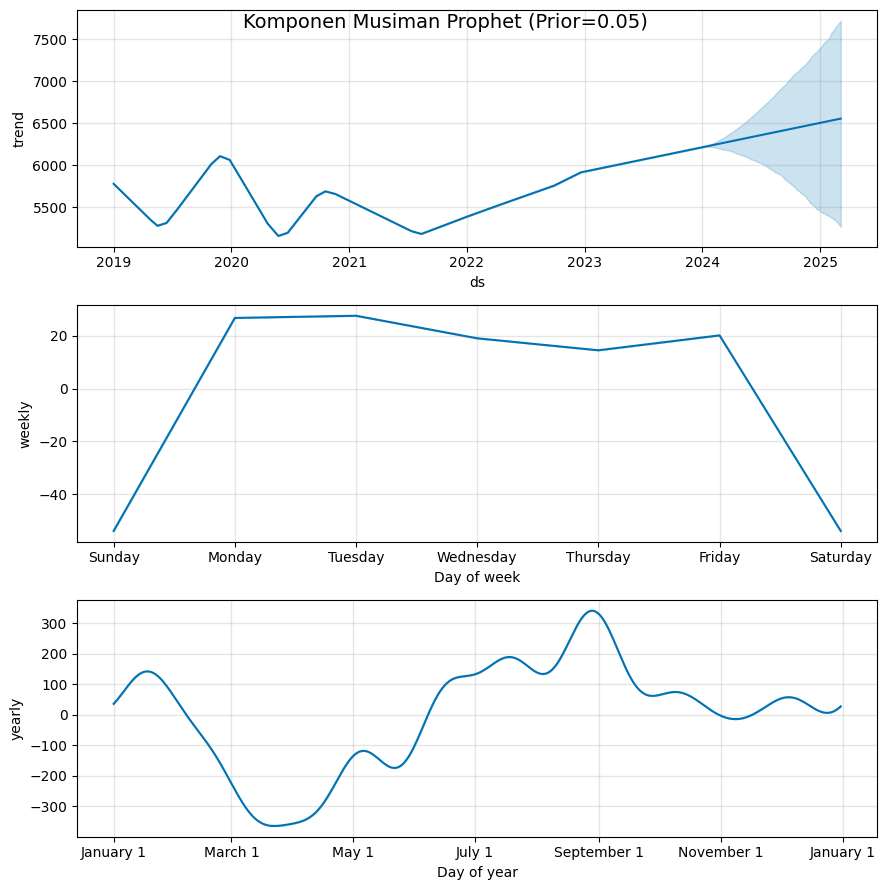

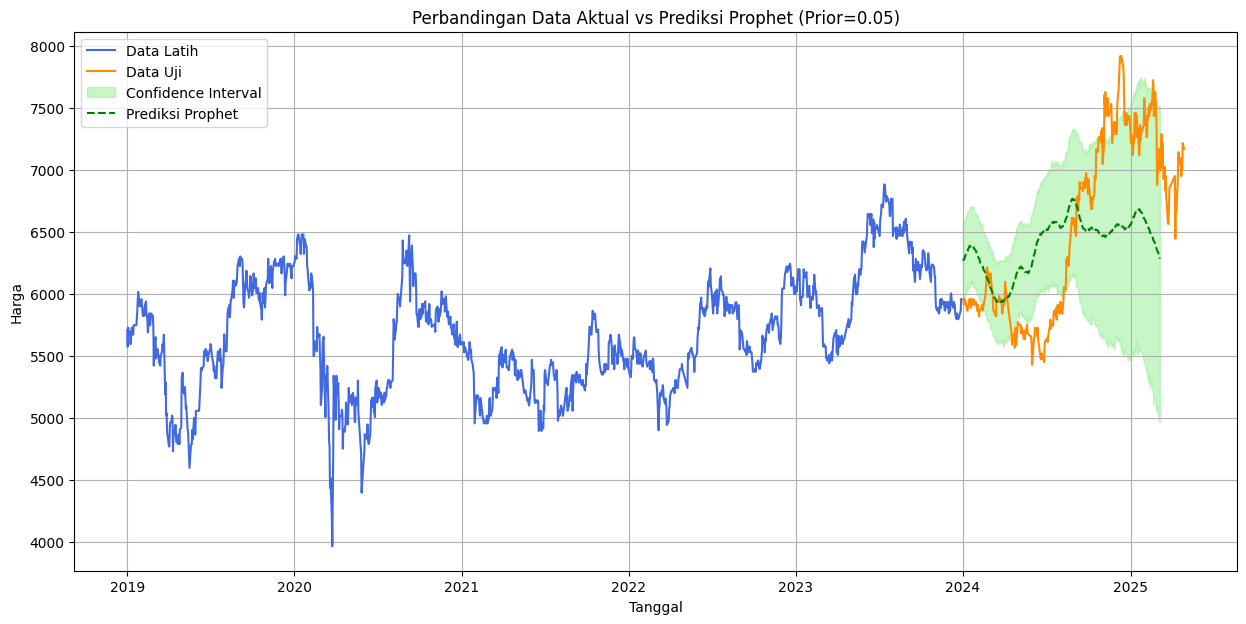

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Menguji Changepoint Prior Scale: 0.1 ---
✅ Hasil: RMSE=1030.41, MAE=804.81, MAPE=11.52


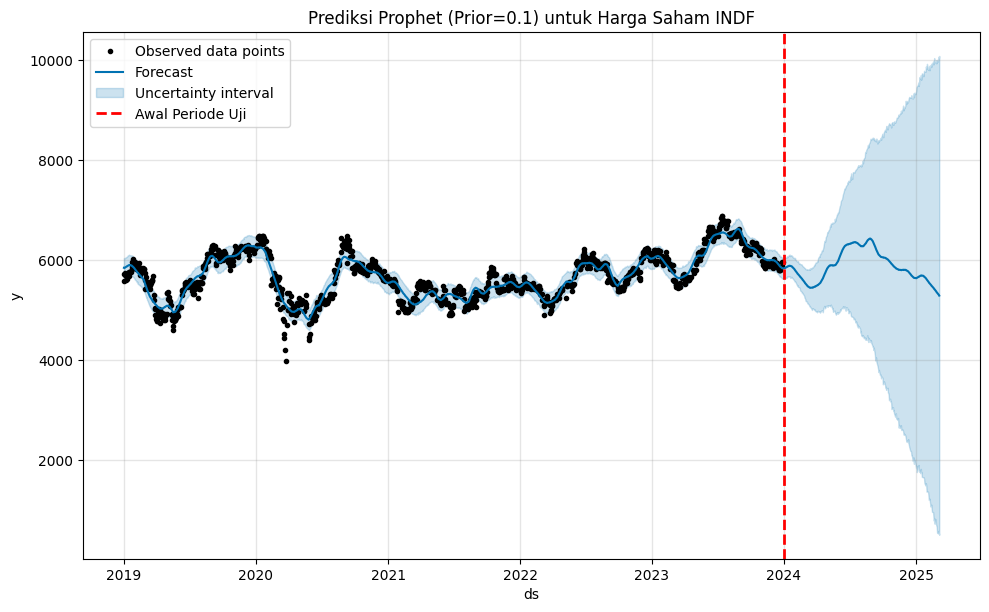

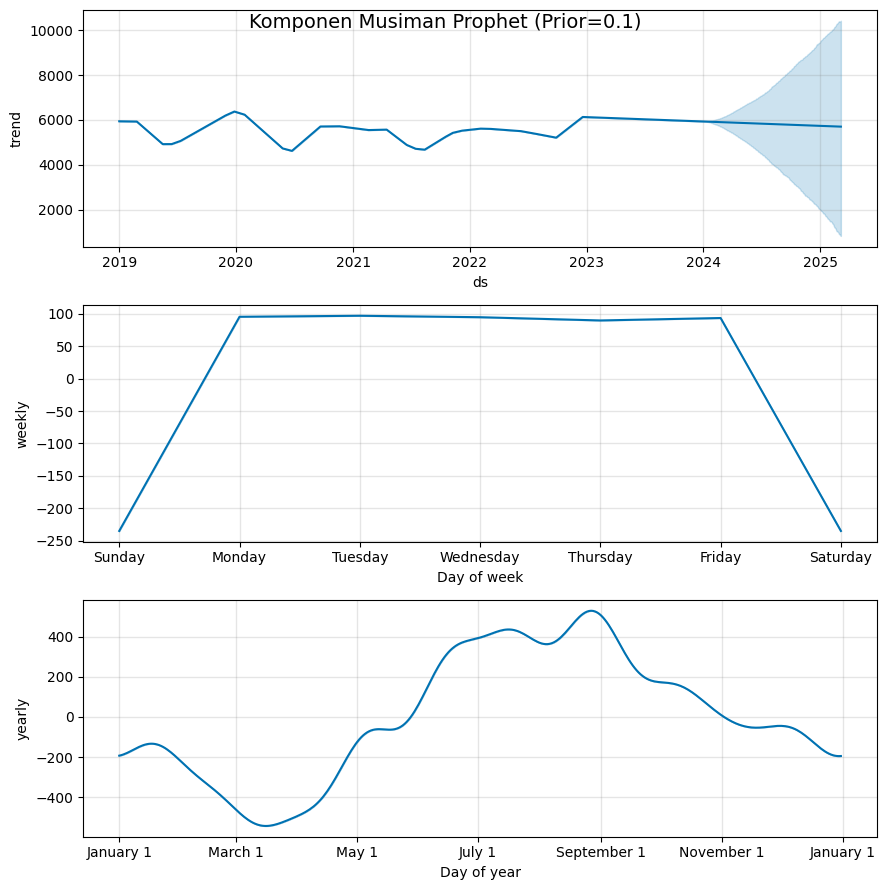

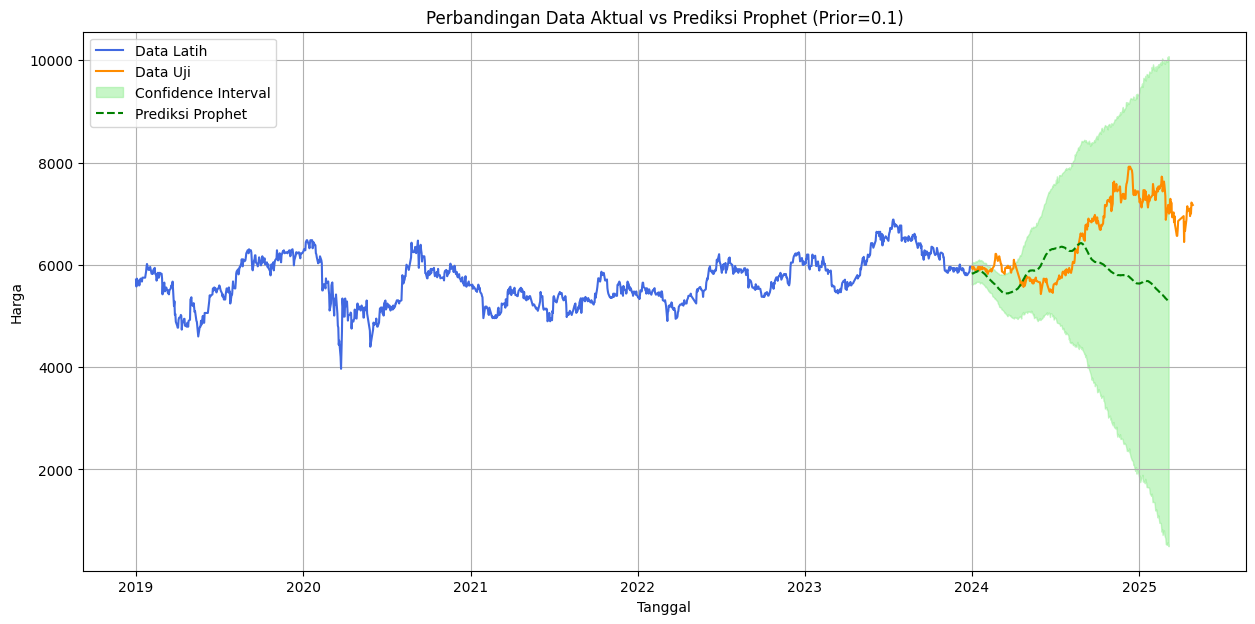

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Menguji Changepoint Prior Scale: 0.5 ---
✅ Hasil: RMSE=1091.12, MAE=866.70, MAPE=12.46


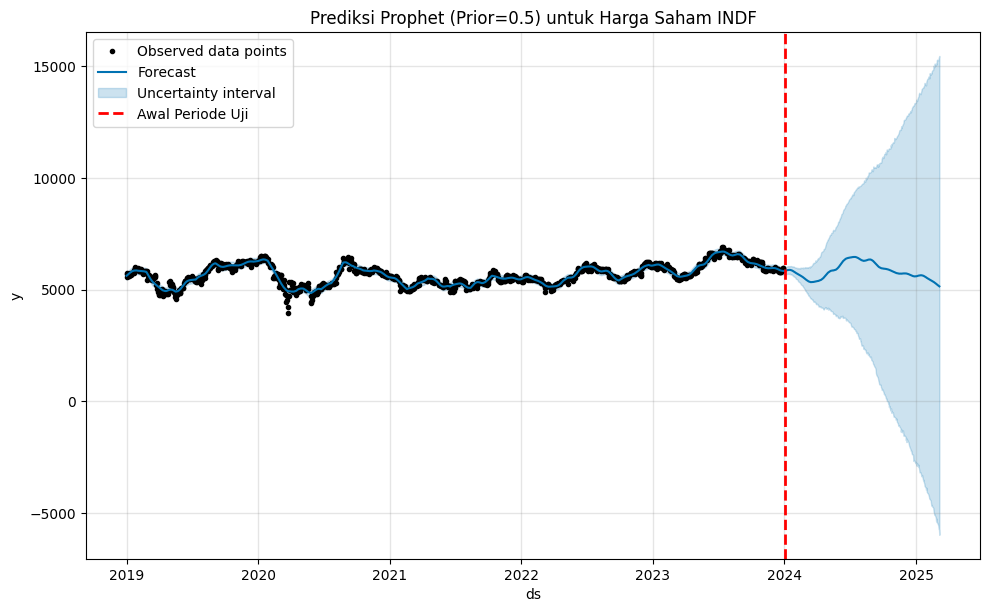

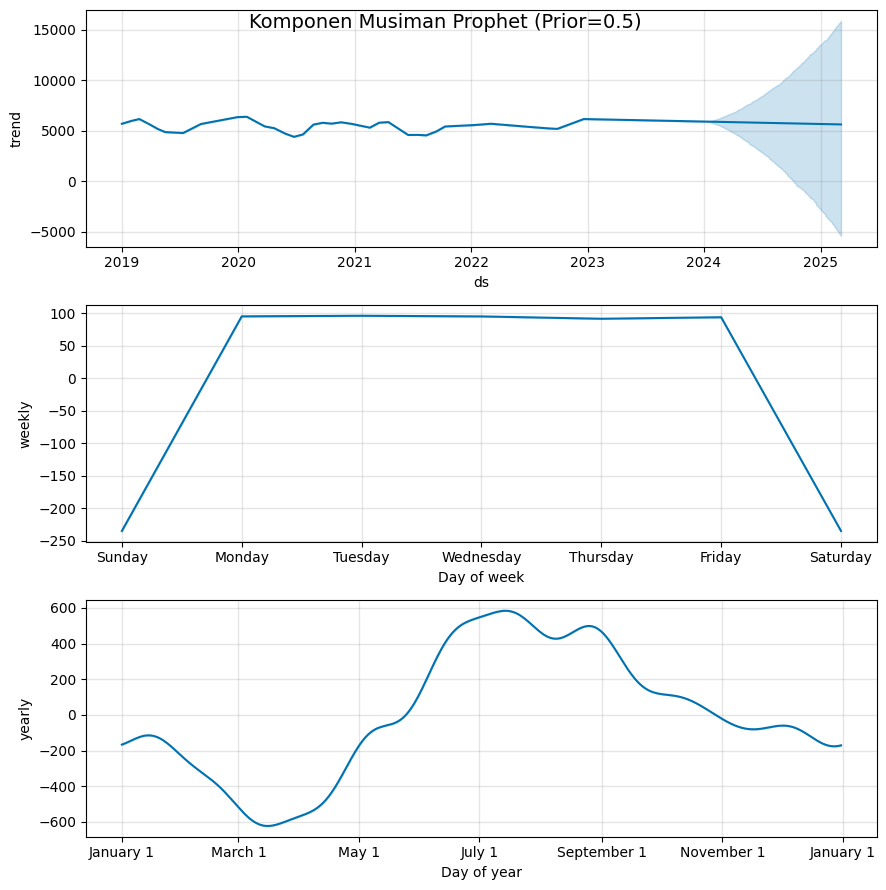

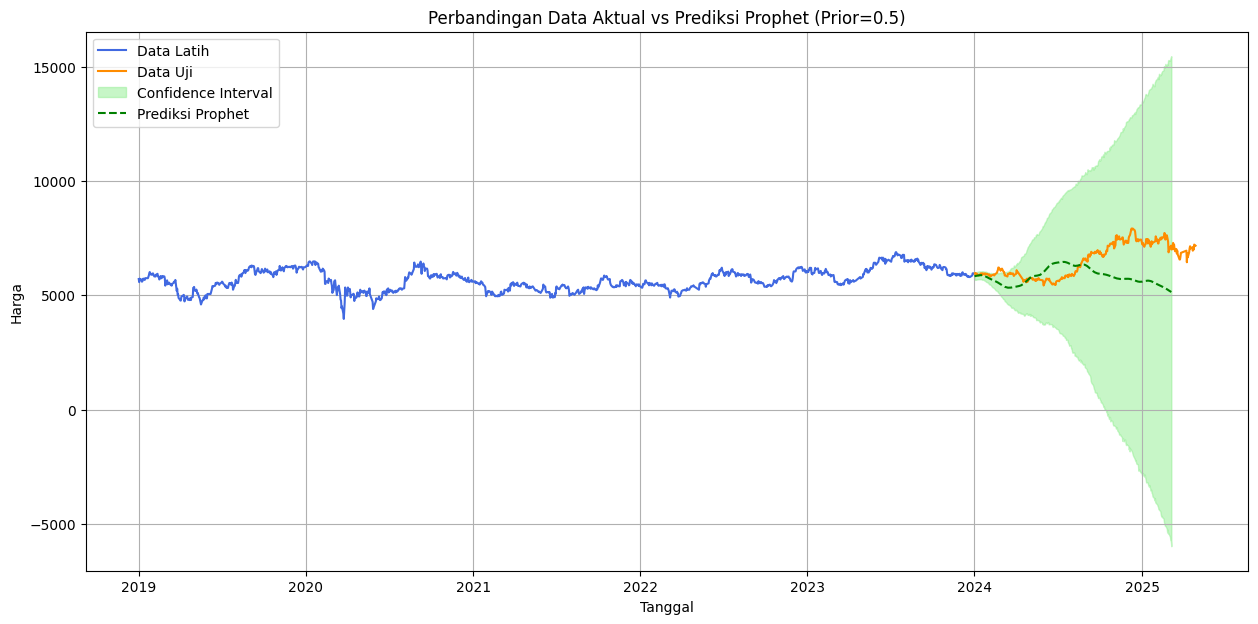

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prophet_train = train.rename(columns={'Date': 'ds', 'Close': 'y'})

changepoint_priors_to_test = [0.001, 0.01, 0.05, 0.1, 0.5]

prophet_results_df = pd.DataFrame(columns=['Changepoint_Prior', 'RMSE', 'MAE', 'MAPE'])

for prior in changepoint_priors_to_test:
    print(f"\n--- Menguji Changepoint Prior Scale: {prior} ---")

    # Prophet dengan pengaturan musiman yang lengkap
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_prior_scale=10,
        n_changepoints=50,
        changepoint_prior_scale=prior
    )

    model.fit(prophet_train)

    future = model.make_future_dataframe(periods=len(test), freq='B')
    forecast = model.predict(future)
    forecast_test = forecast.iloc[-len(test):]

    rmse = np.sqrt(mean_squared_error(test['Close'], forecast_test['yhat']))
    mae = mean_absolute_error(test['Close'], forecast_test['yhat'])
    mape = np.mean(np.abs((test['Close'] - forecast_test['yhat']) / test['Close'])) * 100

    prophet_results_df = pd.concat([prophet_results_df, pd.DataFrame([{
        'Changepoint_Prior': prior,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }])], ignore_index=True)

    print(f"✅ Hasil: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}")

    # Plot bawaan Prophet
    fig1 = model.plot(forecast)
    plt.title(f'Prediksi Prophet (Prior={prior}) untuk Harga Saham INDF')
    plt.axvline(x=test['Date'].min(), color='red', linestyle='--', lw=2, label='Awal Periode Uji')
    plt.legend()
    plt.show()

    # Plot komponen musiman Prophet (trend, weekly, yearly)
    fig2 = model.plot_components(forecast)
    plt.suptitle(f'Komponen Musiman Prophet (Prior={prior})', fontsize=14)

    # Plot Perbandingan Data Aktual vs Prediksi
    plt.figure(figsize=(15, 7))
    plt.title(f'Perbandingan Data Aktual vs Prediksi Prophet (Prior={prior})')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.plot(train['Date'], train['Close'], label='Data Latih', color='royalblue')
    plt.plot(test['Date'], test['Close'], label='Data Uji', color='darkorange')
    plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'],
                     color='lightgreen', alpha=0.5, label='Confidence Interval')
    plt.plot(forecast_test['ds'], forecast_test['yhat'], '--', color='green', label='Prediksi Prophet')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
print("Hasil perbandingan semua model Prophet:")
print(prophet_results_df.sort_values(by='RMSE').to_string(index=False))

Hasil perbandingan semua model Prophet:
 Changepoint_Prior        RMSE        MAE      MAPE
             0.010  499.768966 424.413705  6.467896
             0.050  608.793213 512.888123  7.685623
             0.001  816.936501 632.955274  8.978478
             0.100 1030.406588 804.810480 11.522420
             0.500 1091.122518 866.695718 12.456468


In [ ]:
best_row = prophet_results_df.loc[prophet_results_df['RMSE'].idxmin()]

print("Model Prophet Terbaik berdasarkan RMSE:")
print(f"Changepoint Prior Scale: {best_row['Changepoint_Prior']}")
print(f"RMSE: {best_row['RMSE']:.2f}")
print(f"MAE:  {best_row['MAE']:.2f}")
print(f"MAPE:  {best_row['MAPE']:.2f}")

Model Prophet Terbaik berdasarkan RMSE:
Changepoint Prior Scale: 0.01
RMSE: 499.77
MAE:  424.41
MAPE:  6.47


# Perbandingan Akurasi RMSE dan MAE Model ARIMA dan Prophet

In [ ]:
# Ambil performa ARIMA terbaik
best_arima_row = results_df.loc[results_df['RMSE'].idxmin()]
best_arima_rmse = best_arima_row['RMSE']
best_arima_mae = best_arima_row['MAE']
best_arima_mape = best_arima_row['MAPE']
best_arima_order = best_arima_row['Order']

# Ambil performa Prophet terbaik
best_prophet_row = prophet_results_df.loc[prophet_results_df['RMSE'].idxmin()]
best_prophet_rmse = best_prophet_row['RMSE']
best_prophet_mae = best_prophet_row['MAE']
best_prophet_mape = best_prophet_row['MAPE']
best_prophet_prior = best_prophet_row['Changepoint_Prior']

# Buat dataframe perbandingan
comparison_df = pd.DataFrame([
    {'Model': f'ARIMA{best_arima_order}',
     'Parameter': f'Order={best_arima_order}',
     'RMSE': best_arima_rmse,
     'MAE': best_arima_mae,
     'MAPE': best_arima_mape},
    {'Model': 'Prophet',
     'Parameter': f'changepoint_prior_scale={best_prophet_prior}',
     'RMSE': best_prophet_rmse,
     'MAE': best_prophet_mae,
     'MAPE': best_prophet_mape}
])

print("\nPerbandingan Akurasi Model Terbaik (ARIMA vs Prophet):")
print(comparison_df.to_string(index=False))


Perbandingan Akurasi Model Terbaik (ARIMA vs Prophet):
         Model                    Parameter       RMSE        MAE     MAPE
ARIMA(1, 1, 0)              Order=(1, 1, 0) 907.497839 701.362319 9.983258
       Prophet changepoint_prior_scale=0.01 499.768966 424.413705 6.467896


# Perbandingan Aktual ARIMA Prophet

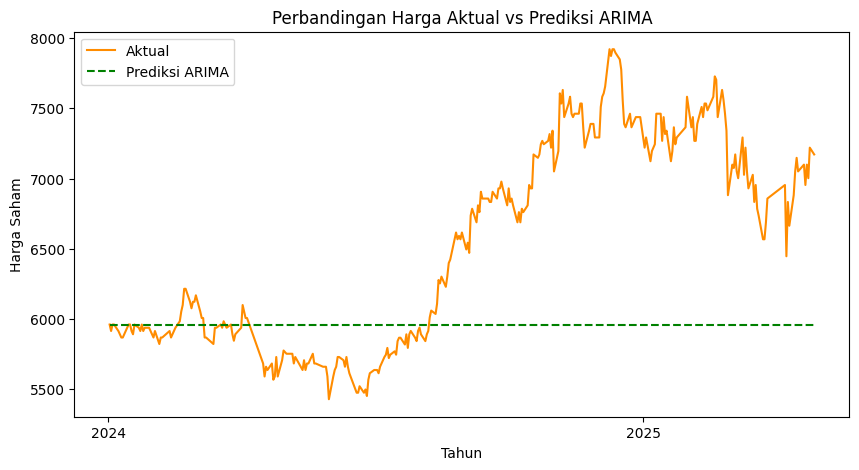

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))
plt.plot(test['Date'], test['Close'], label='Aktual', color='darkorange')
plt.plot(best_forecast.index, best_forecast, label='Prediksi ARIMA', color='green', linestyle='--')

plt.title('Perbandingan Harga Aktual vs Prediksi ARIMA')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


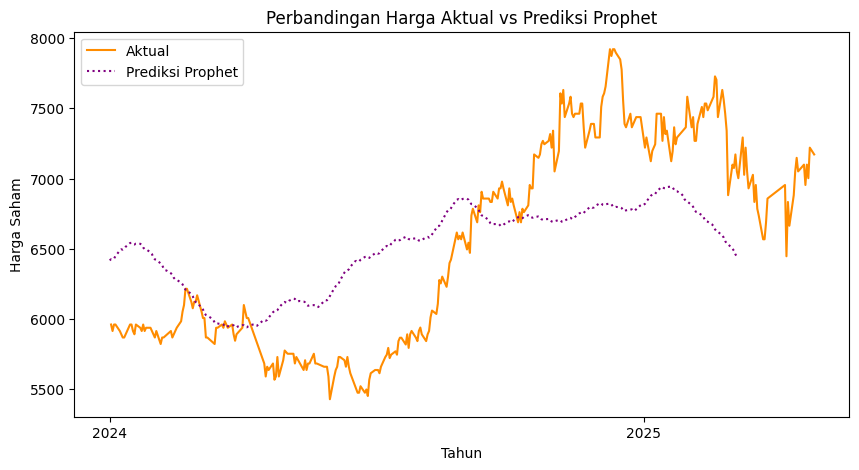

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Recreate prophet_train_df and prophet_test_df
prophet_train_df = train.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_test_df = test.rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit the best Prophet model again to get predictions for plotting
# Use all the parameters from the original model fitting, including seasonality
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_prior_scale=10,
    n_changepoints=50,
    changepoint_prior_scale=best_prophet_prior
)
prophet_model.fit(prophet_train_df)

# Make future dataframe for prediction. Use freq='B' for business days
future = prophet_model.make_future_dataframe(periods=len(prophet_test_df), freq='B')
forecast = prophet_model.predict(future)

# Extract predictions for the test period
prophet_pred = forecast[['ds', 'yhat']].iloc[-len(prophet_test_df):]

# Plot aktual vs prediksi Prophet
plt.figure(figsize=(10,5))
plt.plot(prophet_test_df['ds'], prophet_test_df['y'], label='Aktual', color='darkorange')
plt.plot(prophet_pred['ds'], prophet_pred['yhat'], label='Prediksi Prophet', color='purple', linestyle=':')

plt.title('Perbandingan Harga Aktual vs Prediksi Prophet')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.show()

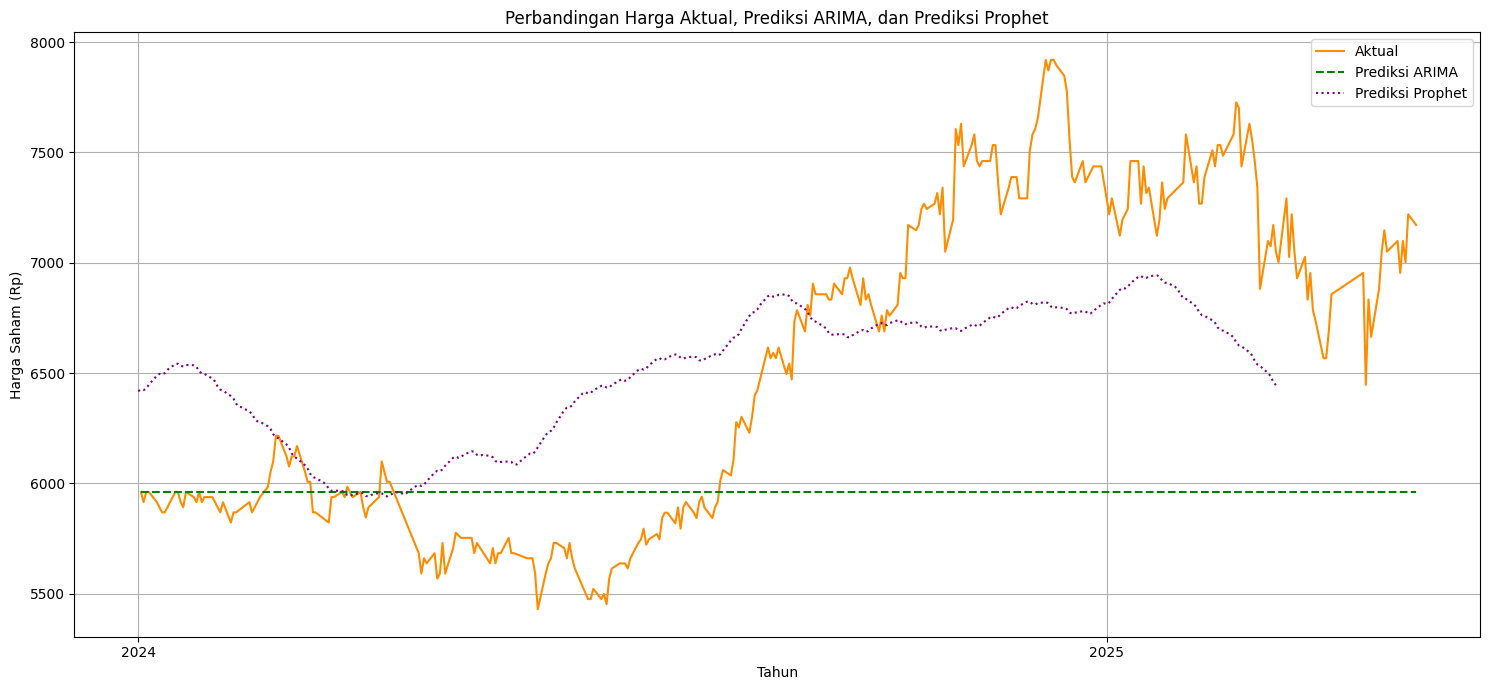

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 7))
plt.plot(test['Date'], test['Close'], label='Aktual', color='darkorange')
plt.plot(best_forecast.index, best_forecast, label='Prediksi ARIMA', color='green', linestyle='--')
plt.plot(prophet_pred['ds'], prophet_pred['yhat'], label='Prediksi Prophet', color='purple', linestyle=':')

plt.title('Perbandingan Harga Aktual, Prediksi ARIMA, dan Prediksi Prophet')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (Rp)')

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()